#### Discrete Simulation HW1
#### Problem 3
Authored: Austin Jetrin Maddison 6481268

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from my_settings import *

In [2]:
np.random.seed(27)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43
  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61
  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89]
[ 22  21  20  19  18  17  16  15  14  13  12  11  10   9   8   7   6   5
   4   3   2   1   0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -11 -12 -13
 -14 -15 -16 -17 -18 -19 -20 -21 -22 -23 -24 -25 -26 -27 -28 -29 -30 -31
 -32 -33 -34 -35 -36 -37 -38 -39 -40 -41 -42 -43 -44 -45 -46 -47 -48 -49
 -50 -51 -52 -53 -54 -55 -56 -57 -58 -59 -60 -61 -62 -63 -64 -65 -66 -67
 -68 -69 -70 -71 -72 -73 -74 -75 -76 -77]

-10 22
33 6.0 90.66666666666667

-9 21
31 6.0 80.0

-8 20
29 6.0 70.0

-7 19
27 6.0 60.666666666666664

-6 18
25 6.0 52.0

-5 17
23 6.0 44.0

-4 16
21 6.0 36.666666666666664

-3 15
19 6

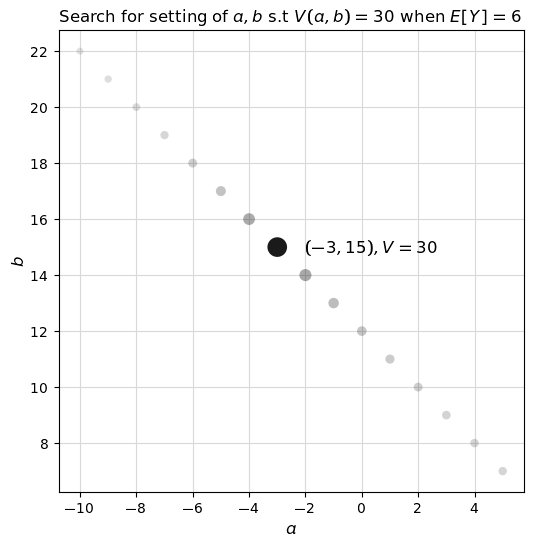

In [108]:
a_s = np.arange(0, 100, 1)
b_s = np.ones(100, dtype=int) * 12 - a_s



d = 10
a_s += -d
b_s += d

print(a_s)
print(b_s)


calc_n = lambda a, b : b - a + 1 
calc_mean = lambda a, b : (calc_n(a,b) - 1) / 2 + a 
calc_var = lambda n : (n**2 - 1) / 12


plt.figure(figsize=(6, 6))
for  i in range(a_s.size):
    a= a_s[i]
    b= b_s[i]

    if a<b:
        distance = np.sqrt((abs(30-calc_var(calc_n(a,b)))+ 1)**-1)
        plt.scatter(a, b, s=distance* 200, alpha = distance, color=(.1, .1, .1), edgecolor='none', zorder=4)

        print()
        print(a, b)
        print(calc_n(a, b), calc_mean(a,b), calc_var(calc_n(a,b)))
    
    
plt.grid(color=(0.85, 0.85, 0.85))

plt.title("Search for setting of $a,b$ s.t $V(a,b) = 30$ when $E[Y]=6$", fontsize=12)
plt.xlabel("$a$", fontsize=12)
plt.ylabel("$b$", fontsize=12)

p = (-3, 15)
plt.annotate(f"$({{{ p[0] }}},{{{p[1]}}}), V=30$", (p[0]+ 1, p[1]-0.2), fontsize=12, zorder = 7)

plt.savefig("tex/p3.svg")



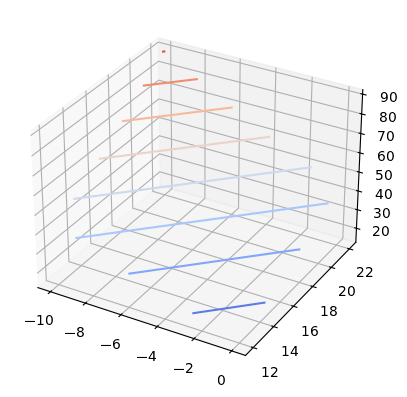

In [8]:
# a_s = np.arange(0, 11, 1)
# b_s = np.ones(11, dtype=int) * 12 - a_s
# 
# d = 10
# a_s += -d
# b_s += d
# 
# X, Y = np.meshgrid(a_s, b_s)
# 
# 
# ax = plt.figure().add_subplot(projection='3d')
# 
# ax.contour(X, Y, calc_var(calc_n(X, Y)), cmap=cm.coolwarm)  # Plot contour curves
# 
# plt.show()


Find $n$ that $p_n \ge 0.99$ 

In [117]:
# N = 400_000
N = 1_000_000

a = 1
b = 6
Y = np.random.geometric( 1/(b-a + 1), N)

In [118]:
ps, ns = np.histogram(Y, bins=np.arange(1, 40, 1))

5.993409
29.940925558718988


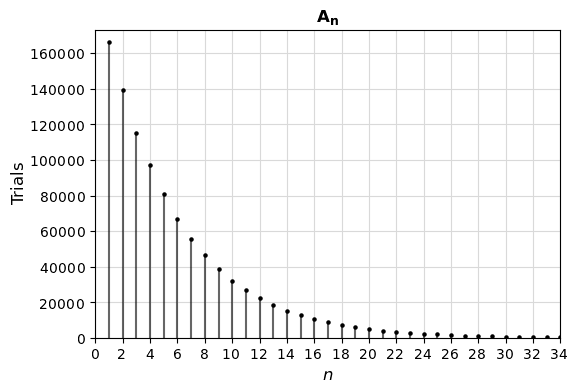

In [144]:
mask = ps <= 0.99      

xs = ns[:-1]
ys = ps

plt.figure(figsize=(6, 4))

plt.scatter(xs, ys, s=5, color="k", marker='o', zorder=4)
plt.vlines(xs, ymax = ys, ymin=np.zeros(ys.size), color='k', alpha = 0.6)


plt.grid(color=(0.85, 0.85, 0.85))
# plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0]-10, intersection[1]-0.08), fontsize=12)
# plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xticks(np.arange(0, 36, 2, dtype=float))
plt.xlim(0, 34)
plt.ylim(0.0, np.max(ys) * 1.04)
plt.title("$\\mathbf{A_n}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("Trials", fontsize=12)

print(np.mean(Y))
print(np.var(Y))

# run_sim_vec = np.vectorize(lambda x: run_sim(x, N))
# ns = np.arange(500, dtype=int)
# ps = run_sim_vec(ns)

In [147]:
ps, ns = np.histogram(Y, bins=np.arange(1, 40, 1), density=True)

5.993409
29.940925558718988


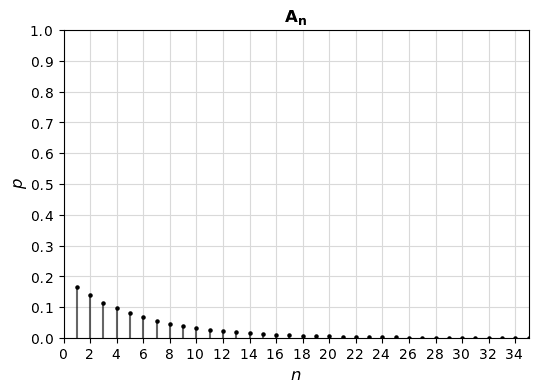

In [150]:
mask = ps <= 0.99      

xs = ns[:-1]
ys = ps

plt.figure(figsize=(6, 4))

plt.scatter(xs, ys, s=5, color="k", marker='o', zorder=4)
plt.vlines(xs, ymax = ys, ymin=np.zeros(ys.size), color='k', alpha = 0.6)


plt.grid(color=(0.85, 0.85, 0.85))
# plt.annotate(f"$p_{{{n}}} = {{{intersection[1]:.3f}}} $",(intersection[0]-10, intersection[1]-0.08), fontsize=12)
plt.yticks(np.arange(0, 1.1, 0.1, dtype=float))
plt.xticks(np.arange(0, 36, 2, dtype=float))
plt.xlim(0, 35)
plt.ylim(0.0, 1)
plt.title("$\\mathbf{A_n}$", fontsize=12)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)

print(np.mean(Y))
print(np.var(Y))

# run_sim_vec = np.vectorize(lambda x: run_sim(x, N))
# ns = np.arange(500, dtype=int)
# ps = run_sim_vec(ns)